In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import itertools
import seaborn as sns

In [150]:
df = pd.read_csv("./results.csv")

In [159]:
display(df.head(5))
display(df["solver"].unique())
display(df["instance"].unique())

,Unnamed: 0,run,seed,HV,HVN,SP,ABSE.HV.MEAN,ABSE.HV.AUC.MEAN,ABSE.HV.AUC.B1,ABSE.CUM.HV.MEAN,...,ABSE.CUM.HV.AUC.B1,ABSE.JF.HV.MEAN,ABSE.JF.HV.AUC.MEAN,ABSE.JF.HV.AUC.B1,ABSE.JF.CUM.HV.MEAN,ABSE.JF.CUM.HV.AUC.MEAN,ABSE.JF.CUM.HV.AUC.B1,solver,instance,configuration
0,0,0,2733,0.780345,0.977111,1.499984,0.195086,4852.378868,19376.426623,0.195086,...,19376.426623,0.195086,4844.106656,19376.426623,0.195086,4852.378868,19376.426623,NSGA-II,MMF15,NaN
1,1,1,43568,0.781491,0.978546,1.500104,0.195373,4851.970541,19345.031874,0.195373,...,19345.031874,0.195373,4836.257968,19345.031874,0.195373,4851.970541,19345.031874,NSGA-II,MMF15,NaN
2,2,2,42614,0.781337,0.978354,1.500259,0.195334,4848.193096,19341.499135,0.195334,...,19341.499135,0.195334,4835.374784,19341.499135,0.195334,4848.193096,19341.499135,NSGA-II,MMF15,NaN
3,3,3,52417,0.781317,0.978328,1.500557,0.195329,4857.879528,19382.138934,0.195329,...,19382.138934,0.195329,4845.534733,19382.138934,0.195329,4857.879528,19382.138934,NSGA-II,MMF15,NaN
4,4,4,45892,0.781723,0.978837,1.500018,0.195431,4857.887548,19375.606510,0.195431,...,19375.606510,0.195431,4843.901628,19375.606510,0.195431,4857.887548,19375.606510,NSGA-II,MMF15,NaN


array(['NSGA-II', 'omnioptimizer', 'MOLE'], dtype=object)

array(['MMF15', 'MMF14', 'ZDT6', 'BiObjBBOB5', 'MMF11', 'MMF7', 'ZDT3',
       'MMF6', 'BiObjBBOB2', 'MMF1z', 'BiObjBBOB4', 'MMF12', 'MMF1',
       'MMF14a', 'ZDT4', 'DTLZ1', 'DTLZ3', 'DTLZ2', 'MMF9', 'MMF5',
       'DTLZ7', 'DTLZ5', 'MMF3', 'DTLZ6', 'BiObjBBOB1', 'MMF10', 'MMF4',
       'MMF2', 'BiObjBBOB3', 'MMF8', 'MMF1e', 'ZDT1', 'MMF15a', 'ZDT2',
       'DTLZ4'], dtype=object)

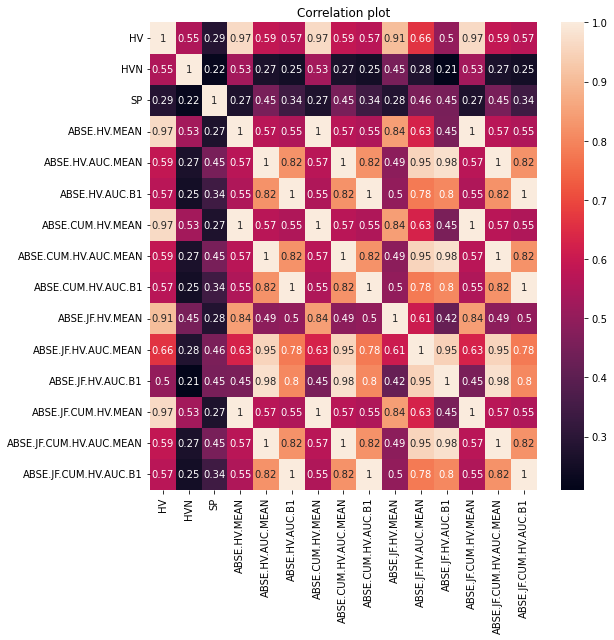

In [172]:
metrics = df.columns[~df.columns.isin(["run", "seed", "Unnamed: 0", "solver", "instance", "configuration"])]
fig, ax = plt.subplots(1, figsize=(9,9))
ax.set_aspect('auto')
sns.heatmap(df[metrics].corr(), annot = True)
ax.set_title("Correlation plot")
plt.tight_layout()
plt.savefig("figures/correlations.pdf")

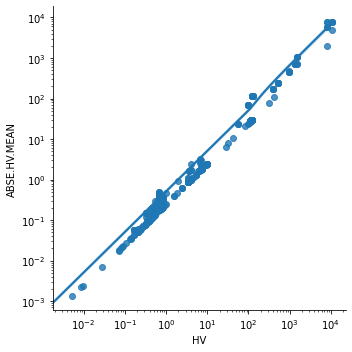

In [166]:
sns.lmplot(x="HV", y="ABSE.HV.MEAN", data=df)
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.savefig("figures/correlation-HV-ABSE.HV.MEAN.pdf")

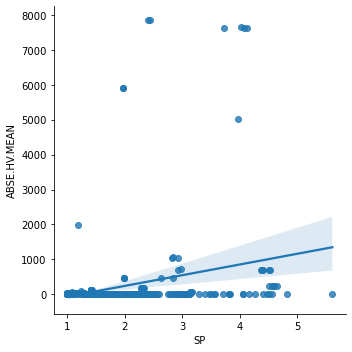

In [171]:
sns.lmplot(x="SP", y="ABSE.HV.MEAN", data=df)
plt.tight_layout()
plt.savefig("figures/correlation-SP-ABSE.HV.MEAN.pdf")

## Anomalies

In the following cases the hypervolume is 0. Need to investigate why that is and why ABSE.HV.AUC.B1 does have an value. Suspicion: ABSE does use different reference points

In [163]:
df[df["HV"] < df["ABSE.HV.MEAN"]]

,Unnamed: 0,run,seed,HV,HVN,SP,ABSE.HV.MEAN,ABSE.HV.AUC.MEAN,ABSE.HV.AUC.B1,ABSE.CUM.HV.MEAN,...,ABSE.CUM.HV.AUC.B1,ABSE.JF.HV.MEAN,ABSE.JF.HV.AUC.MEAN,ABSE.JF.HV.AUC.B1,ABSE.JF.CUM.HV.MEAN,ABSE.JF.CUM.HV.AUC.MEAN,ABSE.JF.CUM.HV.AUC.B1,solver,instance,configuration
102,102,1,43568,0.0,0.0,1.498579,30.250000,48087.002978,1.814734e+05,30.250000,...,1.814734e+05,30.250000,46711.226524,1.814734e+05,30.250000,48087.002978,1.814734e+05,omnioptimizer,ZDT4,NaN
103,103,2,42614,0.0,0.0,1.499448,28.876739,46055.298198,5.832490e+03,28.876739,...,5.832490e+03,28.876739,44781.604039,5.832490e+03,28.876739,46055.298198,5.832490e+03,omnioptimizer,ZDT4,NaN
112,112,1,43568,0.0,0.0,1.499402,28.875151,38981.593556,1.559264e+05,28.875151,...,1.559264e+05,28.875151,43266.826586,1.559264e+05,28.875151,38981.593556,1.559264e+05,omnioptimizer,DTLZ1,NaN
126,126,0,2733,0.0,0.0,1.065453,27.133591,568418.629576,2.273675e+06,27.133591,...,2.273675e+06,0.000000,0.000000,0.000000e+00,27.133591,568418.629576,2.273675e+06,MOLE,DTLZ2,NaN
127,127,1,43568,0.0,0.0,1.053025,27.429434,617547.211421,2.470189e+06,27.429434,...,2.470189e+06,0.000000,0.000000,0.000000e+00,27.429434,617547.211421,2.470189e+06,MOLE,DTLZ2,NaN
129,129,3,52417,0.0,0.0,1.049229,27.499990,683053.229099,2.732213e+06,27.499990,...,2.732213e+06,0.000000,0.000000,0.000000e+00,27.499990,683053.229099,2.732213e+06,MOLE,DTLZ2,NaN
166,166,0,2733,0.0,0.0,1.065453,27.133591,568418.629576,2.273675e+06,27.133591,...,2.273675e+06,0.000000,0.000000,0.000000e+00,27.133591,568418.629576,2.273675e+06,MOLE,DTLZ5,NaN
167,167,1,43568,0.0,0.0,1.053025,27.429434,617547.211421,2.470189e+06,27.429434,...,2.470189e+06,0.000000,0.000000,0.000000e+00,27.429434,617547.211421,2.470189e+06,MOLE,DTLZ5,NaN
169,169,3,52417,0.0,0.0,1.049229,27.499990,683053.229099,2.732213e+06,27.499990,...,2.732213e+06,0.000000,0.000000,0.000000e+00,27.499990,683053.229099,2.732213e+06,MOLE,DTLZ5,NaN
186,186,0,2733,0.0,0.0,1.499248,30.250000,45336.616100,1.813465e+05,30.250000,...,1.813465e+05,0.000000,0.000000,0.000000e+00,30.250000,45336.616100,1.813465e+05,omnioptimizer,DTLZ6,NaN


## Decs and Obj visuals

In [173]:
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

import rpy2.robjects.pandas2ri
rpy2.robjects.pandas2ri.activate()

/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3650817670.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


,fun_calls,value_basin1,value_basin2,value_basin3,value_basin4,mean_value,auc_hv_mean,auc_hv1
0,100.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00
1,200.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00
2,300.0,325.342356,0.000000,0.000000,0.0,81.335589,4.066779e+03,1.626712e+04
3,400.0,325.342356,0.000000,0.000000,0.0,81.335589,1.220034e+04,4.880135e+04
4,500.0,325.342356,250.521822,0.000000,0.0,143.966045,2.346542e+04,8.133559e+04
...,...,...,...,...,...,...,...,...
245,24600.0,836.602156,660.301835,328.798469,0.0,456.425615,1.066880e+07,1.978269e+07
246,24700.0,836.562973,660.298869,328.798469,0.0,456.415078,1.071444e+07,1.986634e+07
247,24800.0,836.315904,660.311105,328.805696,0.0,456.358176,1.076008e+07,1.994999e+07
248,24900.0,836.655924,660.311105,328.816000,0.0,456.445757,1.080572e+07,2.003364e+07


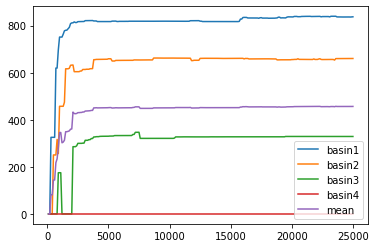

In [174]:
def load_rdata(filepath):
    data = robjects.r['load'](filepath)
    
    objnames = ["dec.space", "dims", "step.sizes", "obj.space", "efficientSets", "decSpaceLabels", "basin_separated_eval"]
    
    result = {}
    
    for i,objname in enumerate(data):
        obj = robjects.r[objname]
        objdict = {}
        for j, field in enumerate(obj):
            if j < 6:
                o = np.array(obj[j])
            else:
                o = pd.DataFrame(obj[j])
            objdict[objnames[j]] = o
        result[objname] = objdict
        
    return result
    
data = load_rdata("visualisation/BiObjBBOB1_NSGA-II.Rdata")

df = data["abse"]["basin_separated_eval"]

plt.plot(df["fun_calls"], df["value_basin1"], label="basin1")
plt.plot(df["fun_calls"], df["value_basin2"], label="basin2")
plt.plot(df["fun_calls"], df["value_basin3"], label="basin3")
plt.plot(df["fun_calls"], df["value_basin4"], label="basin4")
plt.plot(df["fun_calls"], df["mean_value"], label="mean")
plt.legend()
df


In [108]:
data = robjects.r['abse']
data
np.array(data[0])

array([[-5.        , -5.        ],
       [-4.96655518, -5.        ],
       [-4.93311037, -5.        ],
       ...,
       [ 4.93311037,  5.        ],
       [ 4.96655518,  5.        ],
       [ 5.        ,  5.        ]])

In [127]:
data

dec.space,[RTYPES.REALSXP]
dims,[RTYPES.INTSXP]
step.sizes,[RTYPES.REALSXP]
obj.space,[RTYPES.REALSXP]
efficientSets,[RTYPES.VECSXP]
decSpaceLabels,[RTYPES.REALSXP]
basin_separated_eval,[RTYPES.VECSXP]


In [76]:
data = pyreadr.read_r("test.RDS")
data

OrderedDict()

In [95]:
300**2

90000

In [ ]:
np.